### Here I calculate the Chern number using Fukui-Hatsugai method

Todo: Write some code to plots bands given Delta and m_0

In [53]:
using LinearAlgebra
using Plots
using LaTeXStrings
using CSV
using DataFrames
#plotlyjs()

In [54]:
exportdata=1;

In [55]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_13 = kron(sigma_x,sigma_z);
t=1;

In [56]:
function H0(px::Float64,py::Float64,t::Float64,t0::Float64,m_0::Float64)
    return  t*sin(px) *sigma_x + t*sin(py)*sigma_y + (m_0- t0*(cos(px) + cos(py)))*sigma_z
end

H0 (generic function with 1 method)

In [57]:
function H_BDG(px::Float64,py::Float64,t::Float64,t0::Float64,m_0::Float64,Delta::Float64)
    return  kron((eye2 + sigma_z)/2, H0(px,py,t,t0,m_0+Delta)) + kron((eye2 - sigma_z)/2, H0(px,py,t,t0,m_0-Delta))
end

H_BDG (generic function with 1 method)

In [58]:
eigvals(H_BDG(x2[10],y2[20],tt,tt0,mm_0,DDelta))

UndefVarError: UndefVarError: `x2` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [59]:
function band_plot_super(t::Float64,t0::Float64,m_0::Float64,Delta::Float64)
    nn=100;
    x1 = range(0,pi,nn);
	y1 = range(0,0,nn);

	x2 = range(pi,pi,nn);
	y2 = range(0,pi,nn);

	x3 = range(pi,0,nn);
	y3 = range(pi,0,nn);

    E1_1 = zeros(nn)
    E1_2 = zeros(nn)
    E1_3 = zeros(nn)

    E2_1 = zeros(nn)
    E2_2 = zeros(nn)
    E2_3 = zeros(nn)

    E3_1 = zeros(nn)
    E3_2 = zeros(nn)
    E3_3 = zeros(nn)

    E4_1 = zeros(nn)
    E4_2 = zeros(nn)
    E4_3 = zeros(nn)

    vals1 = zeros(4)
    vals2 = zeros(4)
    vals3 = zeros(4)

    for ii = 1:nn
        vals1 = eigvals(H_BDG(x1[ii],y1[ii],t,t0,m_0,Delta))
        E1_1[ii] = vals1[1]
        E2_1[ii] = vals1[2]
        E3_1[ii] = vals1[3]
        E4_1[ii] = vals1[4]

        vals2 = eigvals(H_BDG(x2[ii],y2[ii],t,t0,m_0,Delta))
        E1_2[ii] = vals2[1]
        E2_2[ii] = vals2[2]
        E3_2[ii] = vals2[3]
        E4_2[ii] = vals2[4]

        vals3 = eigvals(H_BDG(x3[ii],y3[ii],t,t0,m_0,Delta))
        E1_3[ii] = vals3[1]
        E2_3[ii] = vals3[2]
        E3_3[ii] = vals3[3]
        E4_3[ii] = vals3[4]
    end


    xtick_positions = [1,nn,2*nn,3*nn]
    xtick_labels = [L"\Gamma", L"X", L"M", L"\Gamma"]
    fig1 = plot(1:nn,E1_1, color="red", ylims=(minimum([minimum(E1_1),minimum(E1_2),minimum(E1_3)])-0.3,maximum([maximum(E4_1),maximum(E4_2),maximum(E4_3)])+0.3),legend=false,xticks=(xtick_positions,xtick_labels),tickfontsize=15,tickfont=font(15, "Computer Modern"),title="H_BdG Bandstructure",ylabel=L"\epsilon_k", guidefont=font(20, "Computer Modern"))
    fig1 = plot!(1:nn,E2_1, color="blue")
    fig1 = plot!(1:nn,E3_1, color="green")
    fig1 = plot!(1:nn,E4_1, color="black")

    fig1 = plot!(nn+1:2*nn,E1_2, color="red")
    fig1 = plot!(nn+1:2*nn,E2_2, color="blue")
    fig1 = plot!(nn+1:2*nn,E3_2, color="green")
    fig1 = plot!(nn+1:2*nn,E4_2, color="black")

    fig1 = plot!(2*nn+1:3*nn,E1_3, color="red")
    fig1 = plot!(2*nn+1:3*nn,E2_3, color="blue")
    fig1 = plot!(2*nn+1:3*nn,E3_3, color="green")
    fig1 = plot!(2*nn+1:3*nn,E4_3, color="black")
end

band_plot_super (generic function with 1 method)

In [60]:
function band_plot_two(t::Float64,t0::Float64,m_0::Float64)
    nn=50;
    x1 = range(0,pi,nn);
	y1 = range(0,0,nn);

	x2 = range(pi,pi,nn);
	y2 = range(0,pi,nn);

	x3 = range(pi,0,nn);
	y3 = range(pi,0,nn);

    E1_1 = zeros(nn)
    E1_2 = zeros(nn)
    E1_3 = zeros(nn)

    E2_1 = zeros(nn)
    E2_2 = zeros(nn)
    E2_3 = zeros(nn)

    vals1 = zeros(2)
    vals2 = zeros(2)
    vals3 = zeros(2)

    for ii = 1:nn
        vals1 = eigvals(H0(x1[ii],y1[ii],t,t0,m_0))
        E1_1[ii] = vals1[1]
        E2_1[ii] = vals1[2]

        vals2 = eigvals(H0(x2[ii],y2[ii],t,t0,m_0))
        E1_2[ii] = vals2[1]
        E2_2[ii] = vals2[2]

        vals3 = eigvals(H0(x3[ii],y3[ii],t,t0,m_0))
        E1_3[ii] = vals3[1]
        E2_3[ii] = vals3[2]
    end

    xtick_positions = [1,nn,2*nn,3*nn]
    xtick_labels = [L"\Gamma", L"X", L"M", L"\Gamma"]
    fig1 = plot(1:nn,E1_1, color="red", ylims=(minimum([minimum(E1_1),minimum(E1_2),minimum(E1_3)])-0.3,maximum([maximum(E2_1),maximum(E2_2),maximum(E2_3)])+0.3),legend=false,xticks=(xtick_positions,xtick_labels),tickfontsize=15,tickfont=font(15, "Computer Modern"),title="H0 Bandstructure",ylabel=L"\epsilon_k", guidefont=font(20, "Computer Modern"))
    fig1 = plot!(1:nn,E2_1, color="blue")

    fig1 = plot!(nn+1:2*nn,E1_2, color="red")
    fig1 = plot!(nn+1:2*nn,E2_2, color="blue")

    fig1 = plot!(2*nn+1:3*nn,E1_3, color="red")
    fig1 = plot!(2*nn+1:3*nn,E2_3, color="blue")
end

band_plot_two (generic function with 1 method)

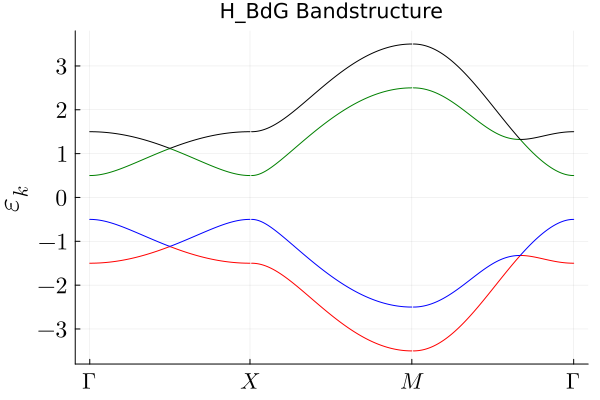

In [61]:
band_plot_super(1.,1.,1.,0.5)

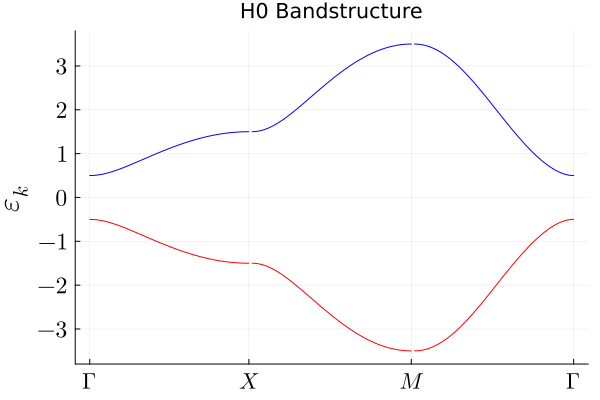

In [62]:
band_plot_two(1.,1.,1.5)

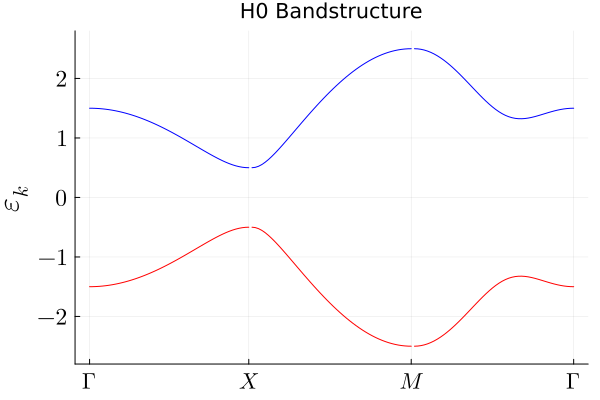

In [63]:
band_plot_two(1.,1.,0.5)

In [64]:
NBands = 4;
NGridpts = 21;

plim = pi
px_array = range(-plim,plim,NGridpts);
py_array = range(-plim,plim,NGridpts);

band = zeros(NBands,NGridpts,NGridpts)*im;
eigenvec_1 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
eigenvec_2 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
eigenvec_3 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
eigenvec_4 = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
vec=zeros(NBands,NBands)*im;
berry_curv1=zeros(NGridpts,NGridpts)*im;
berry_curv2=zeros(NGridpts,NGridpts)*im;
berry_curv3=zeros(NGridpts,NGridpts)*im;
berry_curv4=zeros(NGridpts,NGridpts)*im;


t0 = 1.0;
tt = 1.0;

Nplotpts = 101;
Delta_array = range(0,3,Nplotpts);
m0_array = range(-3.0,3.0,Nplotpts);

Chern_array1 = zeros(Nplotpts,Nplotpts);
Chern_array2 = zeros(Nplotpts,Nplotpts);
Chern_array3 = zeros(Nplotpts,Nplotpts);
Chern_array4 = zeros(Nplotpts,Nplotpts);

results1 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);
results2 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);
results3 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);
results4 = DataFrame(m_0=Float64[], Delta=Float64[], Chern_number=Float64[]);


In [65]:
for iii=1:Nplotpts
    @time for jjj=1:Nplotpts

## Here I calculate the band energy for each (px,py) and find the eigenvector of the valence band
for ii = 1:NGridpts
    for jj = 1:NGridpts
        #if(ishermitian(H0(px_array[ii],py_array[jj],1.0,1.0,1.0))==false)
        #    println(ii)
        #    println(jj)
        #end
        band[:,ii,jj],vec=eigen(H_BDG(px_array[ii],py_array[jj],tt,t0,m0_array[jjj],Delta_array[iii]));
        eigenvec_1[:,ii,jj] = vec[:,1];
        eigenvec_2[:,ii,jj] = vec[:,2];
        eigenvec_3[:,ii,jj] = vec[:,3];
        eigenvec_4[:,ii,jj] = vec[:,4];
    end
end

for ii = 1:(NGridpts-1)#Just to get rid of boundary term
    for jj = 1:(NGridpts-1)
        a1=0.0*im;
        a1 = (eigenvec_1[:,ii,jj+1]'*eigenvec_1[:,ii,jj])*(eigenvec_1[:,ii,jj]'*eigenvec_1[:,ii+1,jj])*(eigenvec_1[:,ii+1,jj]'*eigenvec_1[:,ii+1,jj+1])*(eigenvec_1[:,ii+1,jj+1]'*eigenvec_1[:,ii,jj+1])
        berry_curv1[ii,jj] = imag(log(a1/abs(a1)))

        a2=0.0*im;
        a2 = (eigenvec_2[:,ii,jj+1]'*eigenvec_2[:,ii,jj])*(eigenvec_2[:,ii,jj]'*eigenvec_2[:,ii+1,jj])*(eigenvec_2[:,ii+1,jj]'*eigenvec_2[:,ii+1,jj+1])*(eigenvec_2[:,ii+1,jj+1]'*eigenvec_2[:,ii,jj+1])
        berry_curv2[ii,jj] = imag(log(a2/abs(a2)))

        a3=0.0*im;
        a3 = (eigenvec_3[:,ii,jj+1]'*eigenvec_3[:,ii,jj])*(eigenvec_3[:,ii,jj]'*eigenvec_3[:,ii+1,jj])*(eigenvec_3[:,ii+1,jj]'*eigenvec_3[:,ii+1,jj+1])*(eigenvec_3[:,ii+1,jj+1]'*eigenvec_3[:,ii,jj+1])
        berry_curv3[ii,jj] = imag(log(a3/abs(a3)))

        a4=0.0*im;
        a4 = (eigenvec_4[:,ii,jj+1]'*eigenvec_4[:,ii,jj])*(eigenvec_4[:,ii,jj]'*eigenvec_4[:,ii+1,jj])*(eigenvec_4[:,ii+1,jj]'*eigenvec_4[:,ii+1,jj+1])*(eigenvec_4[:,ii+1,jj+1]'*eigenvec_4[:,ii,jj+1])
        berry_curv4[ii,jj] = imag(log(a4/abs(a4)))
    end
end


Chern_Number1 = sum(x -> !isnan(x) ? x : 0, real(berry_curv1))/(2*pi)

Chern_array1[jjj,iii] = Chern_Number1


Chern_Number2 = sum(x -> !isnan(x) ? x : 0, real(berry_curv2))/(2*pi)

Chern_array2[jjj,iii] = Chern_Number2


Chern_Number3 = sum(x -> !isnan(x) ? x : 0, real(berry_curv3))/(2*pi)

Chern_array3[jjj,iii] = Chern_Number3


Chern_Number4 = sum(x -> !isnan(x) ? x : 0, real(berry_curv4))/(2*pi)

Chern_array4[jjj,iii] = Chern_Number4


push!(results1, (m0_array[iii], Delta_array[jjj], Chern_Number1))
push!(results2, (m0_array[iii], Delta_array[jjj], Chern_Number2))
push!(results3, (m0_array[iii], Delta_array[jjj], Chern_Number3))
push!(results4, (m0_array[iii], Delta_array[jjj], Chern_Number4))

end
println(iii)
end

  2.840911 seconds (10.20 M allocations: 624.358 MiB, 5.13% gc time, 24.67% compilation time)
1
  2.135547 seconds (9.89 M allocations: 608.253 MiB, 5.92% gc time)
2
  2.104576 seconds (9.89 M allocations: 608.187 MiB, 5.67% gc time)
3
  2.154969 seconds (9.89 M allocations: 608.187 MiB, 5.37% gc time)
4
  2.238381 seconds (9.89 M allocations: 608.187 MiB, 5.60% gc time)
5
  2.222769 seconds (9.89 M allocations: 608.227 MiB, 5.23% gc time)
6
  2.243011 seconds (9.89 M allocations: 608.230 MiB, 6.17% gc time)
7
  2.301635 seconds (9.89 M allocations: 608.398 MiB, 5.53% gc time)
8
  2.244978 seconds (9.89 M allocations: 608.230 MiB, 5.55% gc time)
9
  2.240460 seconds (9.89 M allocations: 608.230 MiB, 5.49% gc time)
10
  2.143829 seconds (9.89 M allocations: 608.230 MiB, 5.77% gc time)
11
  2.297795 seconds (9.89 M allocations: 608.230 MiB, 5.29% gc time)
12
  2.130030 seconds (9.89 M allocations: 608.230 MiB, 5.60% gc time)
13
  2.262358 seconds (9.89 M allocations: 608.230 MiB, 5.65% g

In [ ]:
# Define the folder path (relative or absolute)
folder_path = "data/topo_super/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(t)_mu=0_NGridpots=$(NGridpts)"

isdir(string(folder_path,"phase_diagram/")) || mkdir(string(folder_path,"phase_diagram/"))

if exportdata==1
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band1.csv"), results1, writeheader=false)
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band2.csv"), results2, writeheader=false)
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band3.csv"), results3, writeheader=false)
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band4.csv"), results4, writeheader=false)
end


"data/topo_super/phase_diagram/t0=1.0_t=1_mu=0_NGridpots=21band4.csv"

UndefVarError: UndefVarError: `filename` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing FilePathsBase in the current active module Main

In [68]:
m0_array[40],Delta_array[33],Chern_array1[33,40]

(-0.66, 0.96, -0.21283043720789196)

In [69]:
m0_array[40],Delta_array[33],Chern_array2[33,40]

(-0.66, 0.96, 1.327219896637521)

In [70]:
m0_array[40],Delta_array[3],Chern_array3[3,40]

(-0.66, 0.06, 1.0000000000000009)

In [71]:
m0_array[40],Delta_array[3],Chern_array4[3,40]

(-0.66, 0.06, 5.521796321985272e-19)

In [72]:
m0_array[40],Delta_array[3],Chern_array1[3,40]+Chern_array2[3,40]

(-0.66, 0.06, -0.9999999999999994)

Note: It has to be Chern_array'. Somehow it is plotted in the opposite way.

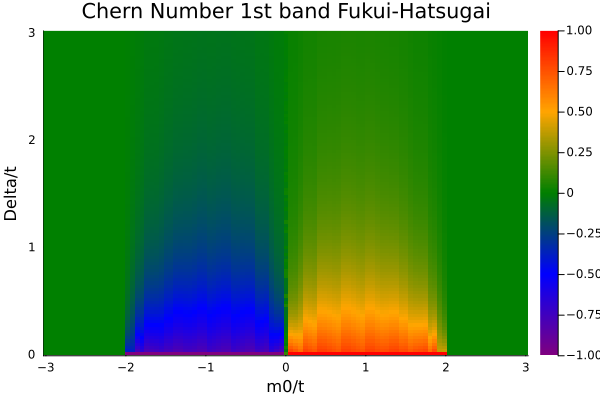

In [73]:
heatmap(m0_array, Delta_array, Chern_array1', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Chern Number 1st band Fukui-Hatsugai")

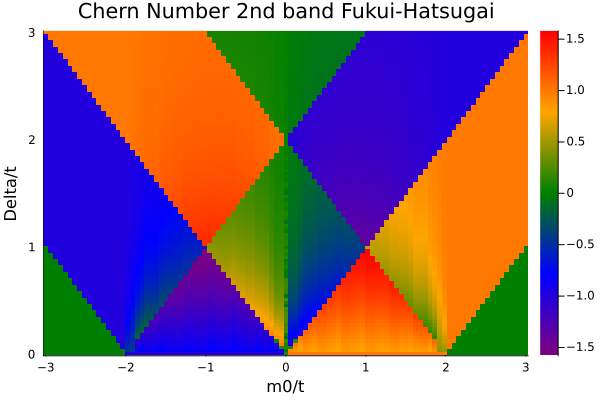

In [74]:
heatmap(m0_array, Delta_array, Chern_array2', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Chern Number 2nd band Fukui-Hatsugai")

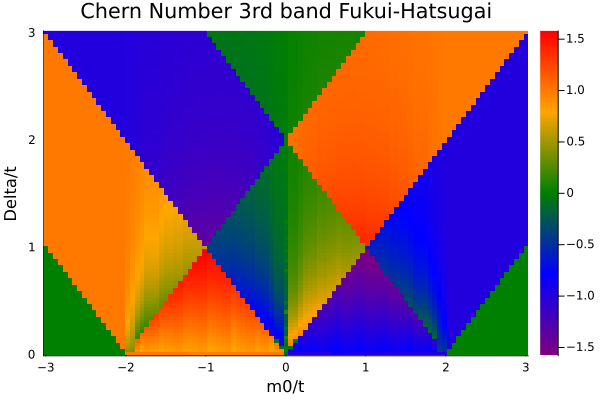

In [75]:
heatmap(m0_array, Delta_array, Chern_array3', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Chern Number 3rd band Fukui-Hatsugai")


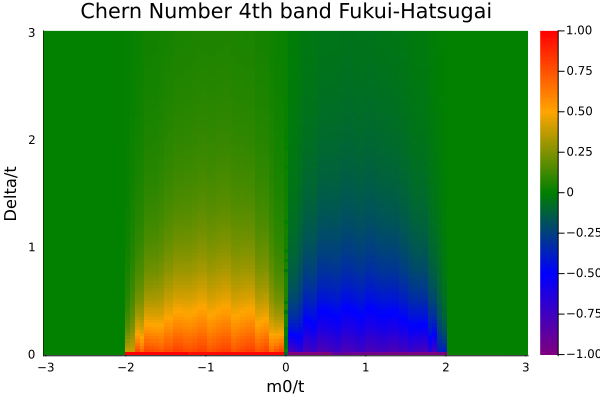

In [76]:
heatmap(m0_array, Delta_array, Chern_array4', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Chern Number 4th band Fukui-Hatsugai")


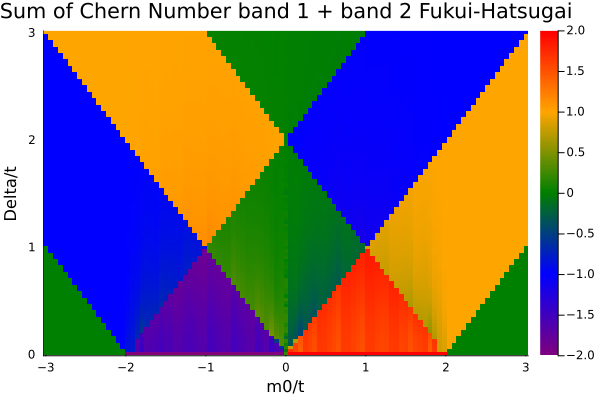

In [77]:
heatmap(m0_array, Delta_array, Chern_array1'+Chern_array2', color = :rainbow, xlabel="m0/t", ylabel="Delta/t", title="Sum of Chern Number band 1 + band 2 Fukui-Hatsugai")